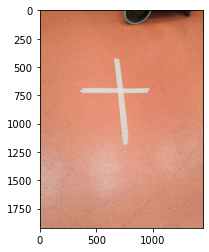

In [17]:
#读取图像

import cv2
import numpy as np
import matplotlib.pyplot as plt
#读入图片，模式为灰度图，创建窗口
scr = cv2.imread("try3.jpg")
scr_2 = scr.copy()
rgb = scr[...,::-1]
plt.imshow(rgb)


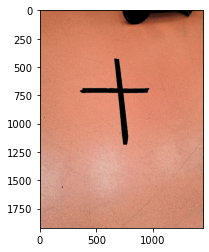

In [18]:
#HSV切割（红色）

# 轉換BGR到HSV
imgHSV = cv2.cvtColor(scr, cv2.COLOR_BGR2HSV)

# range of white color in L channel L通道白色範圍
# mask = cv2.inRange(imgHSV[:,:,1], lower=250, upper=255) 0 70 51  20 255 255
mask = cv2.inRange(imgHSV, np.array([0,43,46]), np.array([15, 255, 255]))#选择纯红到衍生红115范围

# Apply Mask to original image 將蒙版應用到原始圖像
white_mask = cv2.bitwise_and(scr_2,scr_2, mask=mask)
#输出
rgb = white_mask[...,::-1]
plt.imshow(rgb)
#我们能够看到噪音还是很多

In [19]:
# h,s,v = cv2.split(imgHSV)
# cv2.imshow('H',h) #蓝色通道
# cv2.imshow('S',s) #绿色通道
# cv2.imshow('V',v) #红色通道 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

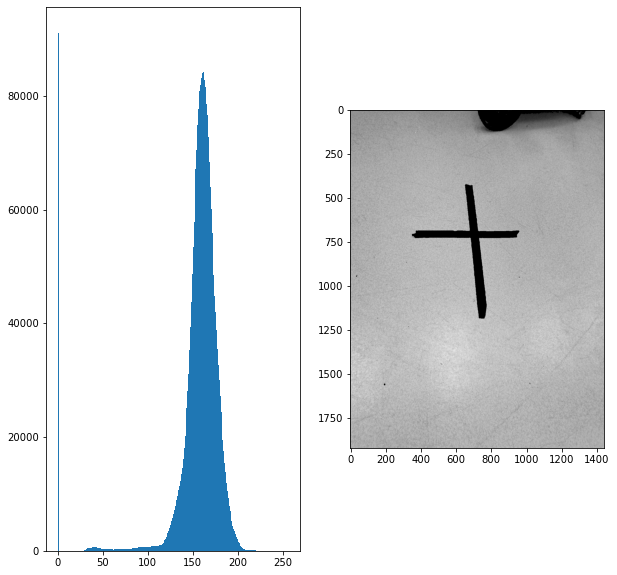

In [20]:
#灰度化

gray = cv2.cvtColor(white_mask,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")

#显示 直方图和灰度图
plt.show()

In [21]:
# #切割噪音

# #这里能看到125之后，都比较少见，可以认为在这个图片里属于噪音，所以都去除
# #当然之后还要调整，包括高光环境的时候会不会也会受到影响。

# ret,thresh1 = cv2.threshold(gray,125,255,4)
# #显示切割后
# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# #直方图
# plt.hist(thresh1.ravel(), 256, [0,256])
# plt.subplot(1,2,2)
# #灰度图
# plt.imshow(thresh1,cmap="gray")

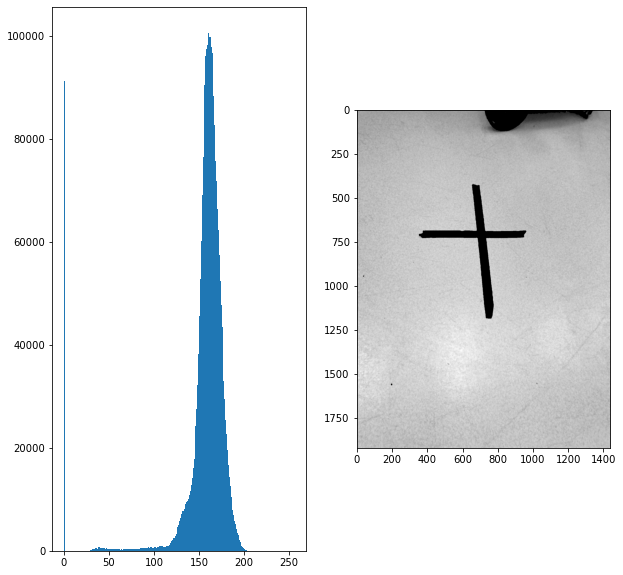

In [22]:
#滤波部分


#高斯模糊不适合
#gray_blur = cv2.GaussianBlur(thresh1,(3,3),0)

#中值凸显特征线段
gray_blur = cv2.medianBlur(gray,5)

#显示中值滤波的成果
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.hist(gray_blur.ravel(), 256, [0,256])
plt.subplot(1,2,2)
plt.imshow(gray_blur,cmap="gray")

In [23]:
# gray_blur

array([[130, 130, 131, ..., 116, 116, 114],
       [130, 130, 130, ..., 115, 115, 114],
       [129, 129, 130, ..., 115, 114, 114],
       ...,
       [160, 158, 156, ..., 161, 161, 162],
       [160, 158, 157, ..., 161, 161, 162],
       [160, 157, 157, ..., 161, 161, 161]], dtype=uint8)

In [9]:
# #灰度图进行高斯滤波
# img = cv2.GaussianBlur(gray,(3,3),0)
# edges_w = cv2.Canny(white_mask, 40, 140, apertureSize = 3)
# plt.figure(figsize=(20,20))
# plt.subplot(1,2,1)
# plt.imshow(edges_w)
# plt.subplot(1,2,2)
# rgb = white_mask[...,::-1]
# plt.imshow(rgb)
# plt.show()

In [10]:
# #直接原始图识别
# gray_scr = cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.hist(gray.ravel(), 256, [0,256])
# plt.subplot(1,2,2)
# #plt.imshow(gray, cmap="gray")

# rgb = scr[...,::-1]
# plt.imshow(rgb)
# plt.show()
#gray = cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY)

(1920, 1440)


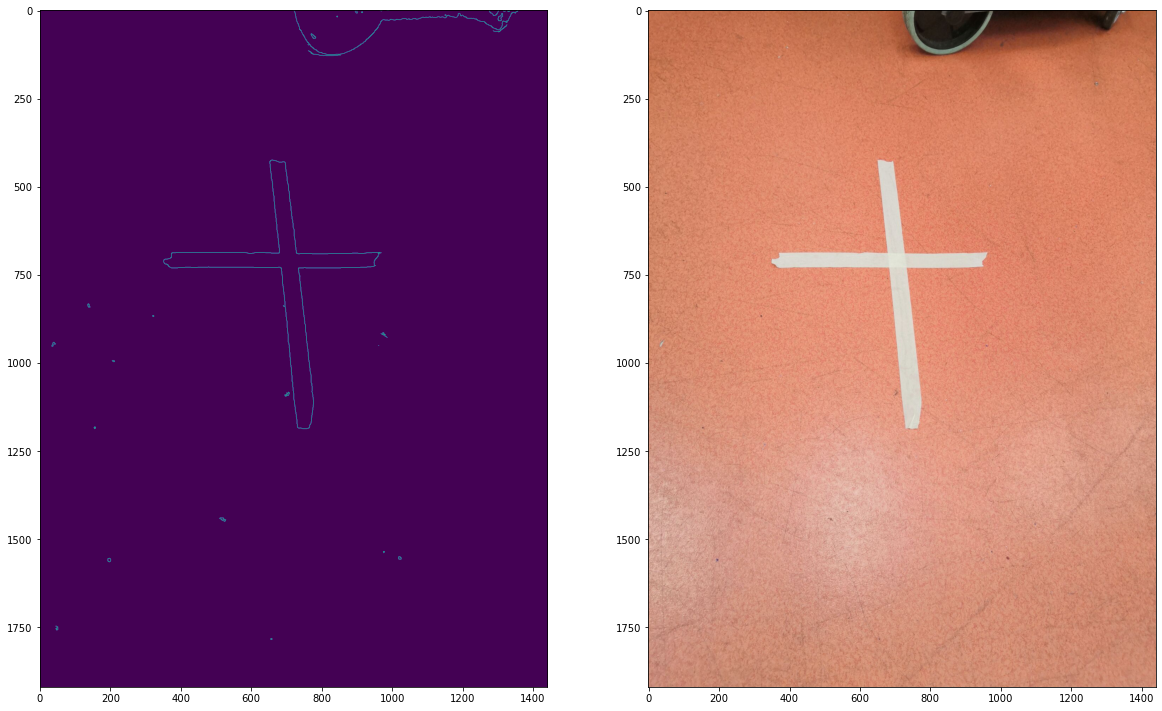

In [24]:
#边缘识别

edges = cv2.Canny(gray_blur, 40, 140, apertureSize = 3)
#输出格式大小
print(gray.shape)

#输出成果与对比
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(edges)
plt.subplot(1,2,2)
rgb = scr[...,::-1]
plt.imshow(rgb)

plt.show()

( 495 , -1057 )  ( 704 , 931 )
9.511961722488039
( 510 , -1070 )  ( 754 , 914 )
8.131147540983607
( -1000 , 686 )  ( 999 , 687 )
0.0005002501250625312
( -1000 , 728 )  ( 999 , 729 )
0.0005002501250625312
( -1011 , 659 )  ( 988 , 694 )
0.017508754377188594
[[[-603.           3.0368729]]

 [[-637.           3.0194197]]

 [[ 687.           1.5707964]]

 [[ 729.           1.5707964]]

 [[ 677.           1.5882496]]]
(1920, 1440, 3)


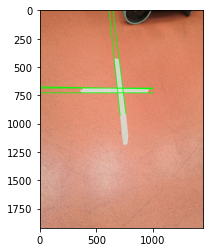

In [30]:
#霍夫识别

tempIamge = scr.copy()
lines = cv2.HoughLines(edges,1,np.pi/180,150)
#自设一个储存线段数据的二维数组
lines_data =np.empty([0,8])
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        #把直线显示在图片上
        cv2.line(tempIamge,(x1,y1),(x2,y2),(0,255,0),5)
        #输出线段点位
        print("(",x1,",",y1,") ",'(',x2,",",y2,')')
        #如果线段不是90度，不是未下定义
        if(x2-x1 != 0):
            slope = abs((y2-y1)/(x2-x1))
            #识别码设为0，方便之后程序整合使用
            a = np.array([(x1,x2,y1,y2,slope,0,rho,theta)])
            lines_data = np.append(lines_data,a, axis=0)
            #输出斜率
            print(slope)
        else:
            slope = 0
            #识别码设为1
            a = np.array([(x1,x2,y1,y2,slope,1,rho,theta)])
            lines_data = np.append(lines_data,a, axis=0)
#输出线段数据        
print(lines)
#输出线段图
print(tempIamge.shape)
rgb = tempIamge[...,::-1]
plt.imshow(rgb)

In [31]:
#输出每条线的斜率（排除未下定义）

for i in range(len(lines_data)):
    if lines_data[i][5] != 1 :
        print(lines_data[i][4])

9.511961722488039
8.131147540983607
0.0005002501250625312
0.0005002501250625312
0.017508754377188594


In [44]:
#将每条线撮合成对应平行线

parallel =np.empty([0,2], dtype = int)
for i in range(len(lines_data)):
    for j in range(i+1,len(lines_data)):
        if((abs(lines_data[i][4]-lines_data[j][4])<0.01)and(lines_data[i][5]!=1)):
            print([i,j])
            a = np.array([(i,j)])
            parallel = np.append(parallel,a, axis=0)
        elif(lines_data[i][5] == 1):
            print(" the line is Vertical line")
            break
if len(parallel)< 2:
    print('7k7k')
    for i in range(len(lines_data)):
        for j in range(i+1,len(lines_data)):
            #print(i,lines_data[i][4]-lines_data[j][4])
            if((abs(lines_data[i][4]-lines_data[j][4])<1.5)and(lines_data[i][5]!=1)and(i!=parallel[0][0])and(i!=parallel[0][1])):
                print([i,j])
                a = np.array([(i,j)])
                parallel = np.append(parallel,a, axis=0)
            elif(lines_data[i][5] == 1):
                print(" the line is Vertical line")
                break

[2, 3]
7k7k
[0, 1]


In [46]:
parallel

array([[2, 3],
       [0, 1]])

In [45]:
#输出撮合的平行线，各自的斜率

parallel_slope = np.zeros(2)
for i in range(len(parallel)):
    slope = (lines_data[parallel[i][0]][4]+lines_data[parallel[i][1]][4])/2
    parallel_slope[i] = slope
    
parallel_slope#parallel[0][0]]

array([5.00250125e-04, 8.82155463e+00])

In [47]:
#将二维数组的平行线地址变成一维

habe = []
for i in range(len(parallel)):
    for j in range(len(parallel[:])):
        habe.append(parallel[i][j])


In [51]:
lines_data[habe[3]][7]

3.0194196701049805

In [57]:
#将平行线数据导入，主要是懒的想

horLine = []
verLine = []
# for i in range(len(habe)):
#     if((lines_data[habe[i]][7]>(0-0.1))&(lines_data[habe[i]][7]<(0+0.1))):
#         horLine.append(lines_data[habe[i]])
#     else:
#         verLine.append(lines_data[habe[i]])
horLine.append(lines_data[habe[0]])
horLine.append(lines_data[habe[1]])
verLine.append(lines_data[habe[2]])
verLine.append(lines_data[habe[3]])

In [59]:
lines_data[habe[3]]

array([  510.        ,   754.        , -1070.        ,   914.        ,
           8.13114754,     0.        ,  -637.        ,     3.01941967])

In [60]:
#计算4条线的相交点

points = []
for l1 in horLine:
    for l2 in verLine:
        a = np.array([
            [np.cos(l1[7]), np.sin(l1[7])],
            [np.cos(l2[7]), np.sin(l2[7])]
        ])
        b = np.array([l1[6],l2[6]])
        points.append(np.linalg.solve(a, b))

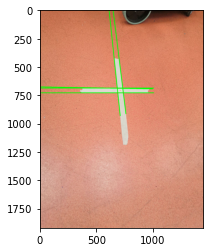

In [61]:
#计算中心点和输出中心点与四条线的相交点

for point in points:
    cv2.circle(tempIamge, (int(point[0]),int(point[1])), 3, (0,0,255))
midx = np.mean([point[0] for point in points])
midy = np.mean([point[1] for point in points])
cv2.circle(tempIamge, (int(midx), int(midy)), 3, (0,0,255))
plt.figure()
rgb = tempIamge[...,::-1]
plt.imshow(rgb)
plt.show()

In [62]:
#盲猜一个中心点上方的位置，提供数据画线

#import sympy   # 引入解方程的专业模块sympy #但是很傻逼，所以没用到
imy = int(midy)
imx = int(midx)
#x = sympy.symbols("x")   # 申明未知数"x"
y = (500-imy)
k=horLine[0][4] #竖的斜率
#a = sympy.solve([(y+k*imx)/(k*x)],[x])   # 写入需要解的方程体
x_wei=(y+k*imx)/(k)
#x_wei = abs(int(a[x]))
x_wei = int(x_wei)
print(x_wei)
print(y+k*imx)
#print(x_wei,parallel_slope[1],v,imy,imx,linet.shape)

-415088
-207.64782391195598


In [22]:
# from fractions import Fraction
# c=Fraction(0.0876)
# print(
# print(c.numerator))


In [23]:
# from fractions import Fraction
# c=str(Fraction(0.0876))
# print(c)
# c_wei=c.find('/')
# x_zhi = c[0:c_wei]

# y_zhi= c[c_wei+1:]

# print()

In [24]:
# if x_zhi > y_zhi:
#     smaller = int(y_zhi)
# else:
#     smaller = int(x_zhi)

# for i in range(1,smaller + 1):
#     if((x % i == 0) and (y % i == 0)):
#         hcf = i
        
# print(hcf)

704 708


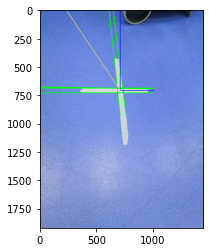

In [63]:
imy = int(midy)
imx = int(midx)
linet=tempIamge.copy()
cv2.line(linet,(imx,0),(imx,imy),(0,0,255),3)#竖向

cv2.line(linet,(1000,imy),(imx,imy),(0,0,255),3)#横向

cv2.line(linet,(230,0),(imx,imy),(255,204,102),3)#中心定位线#66ccff
print(imx,imy)

plt.imshow(linet)
plt.show()

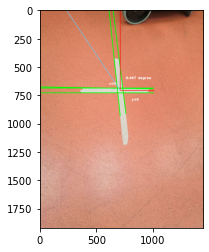

In [64]:
#标识到图上

import math
linet2=linet.copy()
angle = 90-math.degrees(math.atan(parallel_slope[1]))

cv2.putText(linet2,str(angle)[0:5]+' degree',(imx+50,imy-100), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
cv2.putText(linet2,'y=0',(imx+100,imy+90), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
cv2.putText(linet2,'x=0',(imx-100,imy-50), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
rgb = linet2[...,::-1]
plt.imshow(rgb)

plt.show()

In [65]:
cv2.imshow('V',rgb) #红色通道 
cv2.waitKey(0)
cv2.destroyAllWindows()